In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [300]:
df = pd.read_csv('Chocolate Sales.csv')

# Преобразуем колонку Amount из строки в числовой формат
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Преобразуем колонку Date в datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Добавляем категоризацию
high_value_threshold = 7000  # порог для крупной продажи
large_shipment_threshold = 150  # порог для большого груза

df['High Value Sale'] = df['Amount'] > high_value_threshold
df['Large Shipment'] = df['Boxes Shipped'] > large_shipment_threshold

df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,High Value Sale,Large Shipment
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,False,True
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,True,False
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,False,False
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,True,True
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,True,True


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sales Person     3282 non-null   object        
 1   Country          3282 non-null   object        
 2   Product          3282 non-null   object        
 3   Date             3282 non-null   datetime64[ns]
 4   Amount           3282 non-null   float64       
 5   Boxes Shipped    3282 non-null   int64         
 6   High Value Sale  3282 non-null   bool          
 7   Large Shipment   3282 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 160.4+ KB


ЗАДАЧА 1.1 Какова вероятность того, что продажа является крупной (High Value Sale = True), если она была совершена в Великобритании (UK)?

In [302]:
# Способ 1: Вручную
P_uk = (df['Country'] == 'UK').mean()
P_high_and_uk = ((df['High Value Sale'] == True) & (df['Country'] == 'UK')).mean()

P_high_given_uk_manual = P_high_and_uk / P_uk if P_uk > 0 else 0

print(f"P(Крупная|UK) = {P_high_and_uk:.4f} / {P_uk:.4f} = {P_high_given_uk_manual:.4f} ({P_high_given_uk_manual:.2%})")

P(Крупная|UK) = 0.0597 / 0.1627 = 0.3670 (36.70%)


In [303]:
# Способ 2: Через фильтр

# Фильтруем продажи в UK
uk_sales = df[df['Country'] == 'UK']

# Считаем долю крупных продаж среди продаж в UK
P_high_given_uk_filter = (uk_sales['High Value Sale'] == True).mean()

print(f"P(Крупная|UK) = {P_high_given_uk_filter:.4f} ({P_high_given_uk_filter:.2%})")

P(Крупная|UK) = 0.3670 (36.70%)


ЗАДАЧА 1.2: Какова вероятность того, что был отправлен большой груз (Large Shipment = True), если продукт - 'Peanut Butter Cubes'?

In [304]:
# Способ 1: Вручную

P_peanut = (df['Product'] == 'Peanut Butter Cubes').mean()
P_large_and_peanut = ((df['Large Shipment'] == True) & (df['Product'] == 'Peanut Butter Cubes')).mean()

P_large_given_peanut_manual = P_large_and_peanut / P_peanut if P_peanut > 0 else 0

print(f"P(Большой груз|Peanut Butter Cubes) = {P_large_and_peanut:.4f} / {P_peanut:.4f} = {P_large_given_peanut_manual:.4f} ({P_large_given_peanut_manual:.2%})")

P(Большой груз|Peanut Butter Cubes) = 0.0241 / 0.0448 = 0.5374 (53.74%)


In [305]:
# Способ 2: Через фильтр

peanut_sales = df[df['Product'] == 'Peanut Butter Cubes']
P_large_given_peanut_filter = (peanut_sales['Large Shipment'] == True).mean()

print(f"P(Большой груз|Peanut Butter Cubes) = {P_large_given_peanut_filter:.4f} ({P_large_given_peanut_filter:.2%})")

P(Большой груз|Peanut Butter Cubes) = 0.5374 (53.74%)


ЗАДАЧА 1.3: Какова вероятность того, что продавец 'Jehu Rudeforth' совершил продажу, если страна - Австралия?

In [306]:
# Способ 1: Вручную

P_australia = (df['Country'] == 'Australia').mean()
P_jehu_and_australia = ((df['Sales Person'] == 'Jehu Rudeforth') & (df['Country'] == 'Australia')).mean()

P_jehu_given_australia_manual = P_jehu_and_australia / P_australia if P_australia > 0 else 0

print(f"P(Jehu|Australia) = {P_jehu_and_australia:.4f} / {P_australia:.4f} = {P_jehu_given_australia_manual:.4f} ({P_jehu_given_australia_manual:.2%})")

P(Jehu|Australia) = 0.0073 / 0.1874 = 0.0390 (3.90%)


In [307]:
# Способ 2: Через фильтр

australia_sales = df[df['Country'] == 'Australia']
P_jehu_given_australia_filter = (australia_sales['Sales Person'] == 'Jehu Rudeforth').mean()

print(f"P(Jehu|Australia) = {P_jehu_given_australia_filter:.4f} ({P_jehu_given_australia_filter:.2%})")

P(Jehu|Australia) = 0.0390 (3.90%)


ЗАДАЧА 2: Формула полной вероятности  
Известны вероятности того, что продажа является крупной (High Value Sale = True) для каждой страны. Используя формулу полной вероятности, найти общую вероятность того, что случайно выбранная продажа является крупной

In [308]:
def conditional_probability_filter(df, condition_col, condition_val, target_col, target_val=True):
    # Вычисляет условную вероятность через фильтрацию DataFrame
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

In [309]:
# ЗАДАНИЕ 2: Формула полной вероятности
print("ЗАДАНИЕ 2: Формула полной вероятности")
print("Найти общую вероятность крупной продажи (High Value Sale) по всем странам")
print("-" * 50)

# Собираем вероятности для каждой страны
countries_list = df['Country'].unique()
total_prob = 0
contributions = []

print("РАСЧЕТ ПО ФОРМУЛЕ ПОЛНОЙ ВЕРОЯТНОСТИ:")
print(f"{'Страна':<15} {'P(Страна)':<12} {'P(Крупная|Страна)':<20} {'Вклад':<10}")
print("-" * 57)

for country in countries_list:
    P_country = (df['Country'] == country).mean()
    P_high_given_country = conditional_probability_filter(df, 'Country', country, 'High Value Sale')
    contribution = P_high_given_country * P_country
    total_prob += contribution
    
    contributions.append({
        'Страна': country,
        'P(Страна)': P_country,
        'P(Крупная|Страна)': P_high_given_country,
        'Вклад': contribution
    })
    
    print(f"{country:<15} {P_country:<12.4f} {P_high_given_country:<20.4f} {contribution:<10.4f}")

print(f"\nОбщая вероятность крупной продажи P(High Value Sale) = {total_prob:.4f}")
print(f"Прямой расчет из данных: {df['High Value Sale'].mean():.4f}")


ЗАДАНИЕ 2: Формула полной вероятности
Найти общую вероятность крупной продажи (High Value Sale) по всем странам
--------------------------------------------------
РАСЧЕТ ПО ФОРМУЛЕ ПОЛНОЙ ВЕРОЯТНОСТИ:
Страна          P(Страна)    P(Крупная|Страна)    Вклад     
---------------------------------------------------------
UK              0.1627       0.3670               0.0597    
India           0.1682       0.3406               0.0573    
Australia       0.1874       0.3675               0.0689    
New Zealand     0.1581       0.3565               0.0564    
USA             0.1636       0.3743               0.0612    
Canada          0.1600       0.3467               0.0555    

Общая вероятность крупной продажи P(High Value Sale) = 0.3589
Прямой расчет из данных: 0.3589


ЗАДАЧА 3: Теорема Байеса  
Мы видим продажу, которая является крупной (High Value Sale = True). Какова вероятность того, что она была совершена в Индии?

In [310]:
# Определяем вероятности
P_india = (df['Country'] == 'India').mean()
P_high_given_india = conditional_probability_filter(df, 'Country', 'India', 'High Value Sale')
P_high = df['High Value Sale'].mean()

# Применяем теорему Байеса
P_india_given_high = (P_high_given_india * P_india) / P_high if P_high > 0 else 0

print("ПРИМЕНЕНИЕ ТЕОРЕМЫ БАЙЕСА:")
print(f"P(India) = {P_india:.4f}")
print(f"P(High Value Sale | India) = {P_high_given_india:.4f}")
print(f"P(High Value Sale) = {P_high:.4f}")
print(f"\nP(India | High Value Sale) = [P(High|India) * P(India)] / P(High)")
print(f"P(India | High Value Sale) = ({P_high_given_india:.4f} * {P_india:.4f}) / {P_high:.4f}")
print(f"P(India | High Value Sale) = {P_india_given_high:.4f} ({P_india_given_high:.2%})")


ПРИМЕНЕНИЕ ТЕОРЕМЫ БАЙЕСА:
P(India) = 0.1682
P(High Value Sale | India) = 0.3406
P(High Value Sale) = 0.3589

P(India | High Value Sale) = [P(High|India) * P(India)] / P(High)
P(India | High Value Sale) = (0.3406 * 0.1682) / 0.3589
P(India | High Value Sale) = 0.1596 (15.96%)


Сравнить априорное распределение стран P(Страна) и апостериорное распределение P(Страна | High Value Sale).  
Сделать вывод о том, какие страны чаще совершают крупные продажи относительно их общей доли в каталоге.


СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ СТРАН:
        Страна  P(Страна)  P(Страна | Крупная)  Изменение (%)
4          USA     0.1636               0.1706         4.2834
2    Australia     0.1874               0.1919         2.3827
0           UK     0.1627               0.1664         2.2605
3  New Zealand     0.1581               0.1570        -0.6889
5       Canada     0.1600               0.1545        -3.4160
1        India     0.1682               0.1596        -5.1118


C:\TEMP\Temp\ipykernel_25800\2419837082.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(countries_list, rotation=45, ha='right')


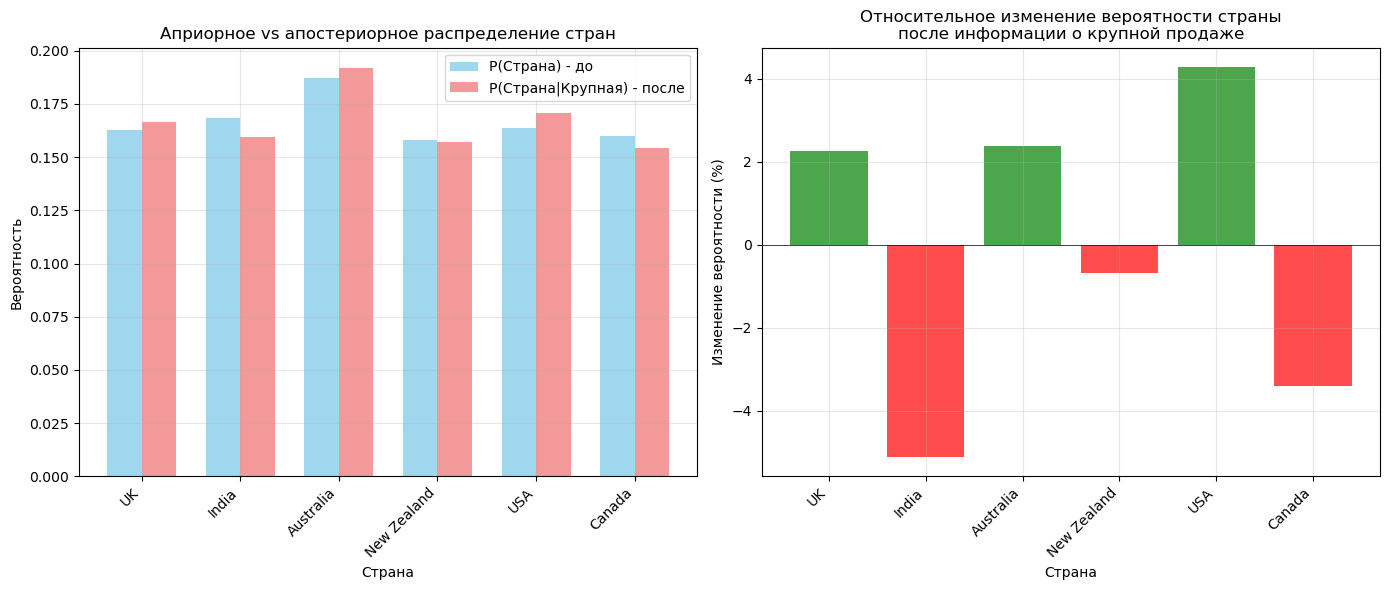

In [311]:
# Рассчитываем апостериорные вероятности для всех стран
prior_probs = []
posterior_probs = []
prob_change = []

for country in countries_list:
    P_country = (df['Country'] == country).mean()
    P_high_given_country = conditional_probability_filter(df, 'Country', country, 'High Value Sale')
    P_country_given_high = (P_high_given_country * P_country) / P_high if P_high > 0 else 0
    
    prior_probs.append(P_country)
    posterior_probs.append(P_country_given_high)
    
    if P_country > 0:
        change = (P_country_given_high - P_country) / P_country * 100
    else:
        change = 0
    prob_change.append(change)

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame({
    'Страна': countries_list,
    'P(Страна)': prior_probs,
    'P(Страна | Крупная)': posterior_probs,
    'Изменение (%)': prob_change
})

# Сортируем по изменению вероятности
comparison_df = comparison_df.sort_values('Изменение (%)', ascending=False)

print("\nСРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ СТРАН:")
print(comparison_df.round(4))

# Визуализация сравнения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Априорное vs апостериорное распределение
x = range(len(countries_list))
width = 0.35

ax1.bar([i - width/2 for i in x], prior_probs, width, label='P(Страна) - до', color='skyblue', alpha=0.8)
ax1.bar([i + width/2 for i in x], posterior_probs, width, label='P(Страна|Крупная) - после', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Страна')
ax1.set_ylabel('Вероятность')
ax1.set_title('Априорное vs апостериорное распределение стран')
ax1.set_xticks(x)
ax1.set_xticklabels(countries_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Изменение вероятности
colors = ['green' if inc > 0 else 'red' for inc in prob_change]
ax2.bar(countries_list, prob_change, color=colors, alpha=0.7)
ax2.set_xlabel('Страна')
ax2.set_ylabel('Изменение вероятности (%)')
ax2.set_title('Относительное изменение вероятности страны\nпосле информации о крупной продаже')
ax2.set_xticklabels(countries_list, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()